In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TASK 1

In [6]:
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
X = housing.data
Y = housing.target

# doar pentru vizualizare - data frame - in continuare vom lucra strict cu X si Y 
df = pd.DataFrame(X, columns=housing.feature_names)
df ['target'] = Y
df.sample(10)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20213  4.7333      33.0  6.796143   1.038567      1052.0  2.898072     34.28   
9525   4.4250      30.0  5.858462   1.018462       816.0  2.510769     39.15   
7723   4.6750      33.0  6.060440   1.079670       973.0  2.673077     33.94   
15676  4.1990      52.0  3.649215   1.064136      1302.0  1.704188     37.80   
15228  5.9289       5.0  6.692853   1.041211      4496.0  2.895042     33.07   
11404  5.5501      17.0  6.662651   1.008032      1520.0  3.052209     33.72   
12412  3.0682      14.0  5.493069   1.120792      1530.0  3.029703     33.73   
3499   5.1296      35.0  5.958491   1.132075      1012.0  3.818868     34.27   
19383  2.3523      28.0  5.206897   1.000000       535.0  2.306034     37.77   
6566   5.0953      39.0  5.946759   0.986111      1282.0  2.967593     34.20   

       Longitude  target  
20213    -119.22   2.575  
9525     -123.17   1.619  
7723     -118.12   2.830  
15676    -122.43   4.000  
15228    -117.20   4.113  
11404    -117.92   2.742  
12412    -116.24   1.041  
3499     -118.45   1.959  
19383    -120.86   0.947  
6566     -118.14   2.074

## PREPROCESS

In [10]:
# pentru a vedea daca avem NA in data set - per coloane 
df.isna().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
target        False
dtype: bool

In [11]:
df.shape

(20640, 9)

### duplicate

In [12]:
df.drop_duplicates()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

### outliers

In [17]:
def process_outliers(data, column):
    # Calculate quantiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Add outlier column for identification
    data['outlier'] = (data[column] < lower_bound) | (data[column] > upper_bound)

    return data

# Example usage
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame
column = "MedInc"

# Process outliers
data = process_outliers(data, column)
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  outlier  
0    -122.23        4.526     True  
1    -122.22        3.585     True  
2    -122.24        3.521    False  
3    -122.25        3.413    False  
4    -122.25        3.422    False  


<Axes: xlabel='HouseAge', ylabel='Count'>

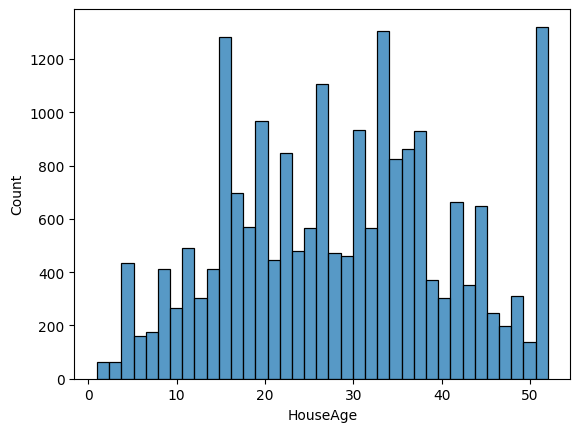

In [18]:
sns.histplot(data=df, x=df.columns[1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge 



In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [29]:
ss = StandardScaler()
X_train_prep = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


# mms = MinMaxScaler()


In [31]:
ss = StandardScaler()

def preprocess1 (X_train, X_test):
    ss = StandardScaler()
    X_train_prep = ss.fit_transform(X_train)
    X_test_prep = ss.transform(X_test)
    return X_train_prep, X_test_prep

def preprocess2(X_train, X_test):
    mms = MinMaxScaler()
    X_train_prep = mms.fit_transform(X_train)
    X_test_prep = mms.transform(X_test)
    return X_train_prep, X_test_prep

X_train_prep1, X_test_prep1 = preprocess1(X_train, X_test)
X_train_prep2, X_test_prep2 = preprocess1(X_train, X_test)


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def preprocess_standard_scaler(X_train, X_test):
    """
    Preprocess data using StandardScaler.
    """
    pipe = Pipeline([
        ('scaler', StandardScaler())
    ])
    X_train_prep = pipe.fit_transform(X_train)
    X_test_prep = pipe.transform(X_test)
    return X_train_prep, X_test_prep

def preprocess_minmax_scaler(X_train, X_test):
    """
    Preprocess data using MinMaxScaler.
    """
    pipe = Pipeline([
        ('scaler', MinMaxScaler())
    ])
    X_train_prep = pipe.fit_transform(X_train)
    X_test_prep = pipe.transform(X_test)
    return X_train_prep, X_test_prep

# Example usage
X_train_prep1, X_test_prep1 = preprocess_standard_scaler(X_train, X_test)
X_train_prep2, X_test_prep2 = preprocess_minmax_scaler(X_train, X_test)
    

### FEATURE ENGINEERING

In [35]:
df.HouseAge

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: HouseAge, Length: 20640, dtype: float64

<Axes: xlabel='HouseAge', ylabel='Count'>

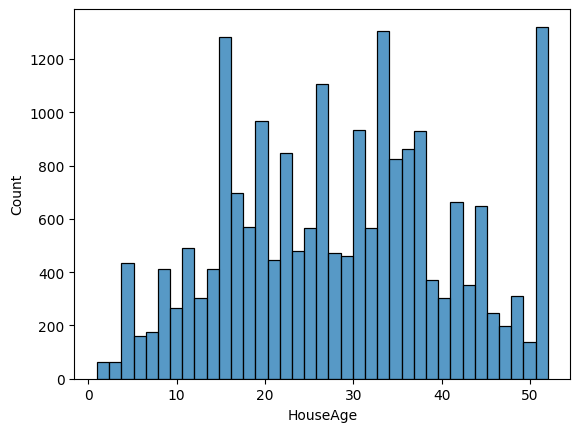

In [36]:
sns.histplot(df.HouseAge)

In [48]:
df

# pentru LATITUDINE SI LONGITUDINE nu le putem lasa asa ca feature numerice - nu au sens !!!
### fie le excludem fie le facem in griduri (imparrtirea tarii in patratele)
### le-am intersectat, facand un grid - id grid - practic am facut o coloana categorica 

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target         loc_id  
0        -122.23   4.526  37.88_-122.23  
1        -122.22   3.585  37.86_-122.22  
2        -122.24   3.521  37.85_-122.24  
3        -122.25   3.413  37.85_-122.25  
4        -122.25   3.422  37.85_-122.25  
...          ...     ...            ...  
20635    -121.09   0.781  39.48_-121.09  
20636    -121.21   0.771  39.49_-121.21  
20637    -121.22   0.923  39.43_-121.22  
20638    -121.32   0.847  39.43_-121.32  
20639    -121.24   0.894  39.37_-121.24  

[20640 rows x 10 columns]

In [41]:
# grid_size = marirea fiecarei celule 

import numpy as np
from sklearn.preprocessing import FunctionTransformer


def location_to_grid(latitude, longitude, latitude_min, latitude_max, longitude_min, longitude_max, grid_size=0.5):
    """
    Transforms latitude and longitude coordinates into a grid ID.

    Args:
        latitude: Latitude coordinate.
        longitude: Longitude coordinate.
        latitude_min: Minimum latitude of the grid.
        latitude_max: Maximum latitude of the grid.
        longitude_min: Minimum longitude of the grid.
        longitude_max: Maximum longitude of the grid.
        grid_size: Size of each grid cell (in degrees).

    Returns:
        A unique grid ID for the given location.
    """

    # Calculate the row and column indices within the grid
    row = int(np.floor((latitude - latitude_min) / grid_size))
    col = int(np.floor((longitude - longitude_min) / grid_size))

    # Create a unique grid ID
    grid_id = row * (int(np.ceil((longitude_max - longitude_min) / grid_size))) + col

    return grid_id

location_transformer = FunctionTransformer(
    lambda X: X.apply(lambda row: location_to_grid(row['Latitude'], row['Longitude'], latitude_min, latitude_max, longitude_min, longitude_max, grid_size), axis=1).values.reshape(-1, 1),
    validate=False
)

In [ ]:
## LAMBDA PRIMESTE O COLOANA SI RETURNEAZA FUNCTIE
### NECESAR CAND FOLOSIM SI APPLY - PT CA apply primeste 1 parametru, iar in cazul de fata primea un singur parametru - 1 rand cu 2 coloane
### 2 parametrii - nu doar 1 

## altfel lasam doar apply, fara lambda 

In [ ]:
latlatitude_min, latitude_max = df['Latitude'].min(), df['Latitude'].max()
longitude_min, longitude_max = df['Longitude'].min(), df['Longitude'].max()

df['loc_id'] = df[['Latitude', 'Longitude']].apply(lambda x: f"{x['Latitude']}_{x['Longitude']}", axis=1)

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

ss = StandardScaler()

def preprocess1(X_train, X_test):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('location_to_grid', location_transformer),
    ])
    
    X_train_prep = pipe.fit_transform(X_train)
    X_test_prep = pipe.transform(X_test)
    return X_train_prep, X_test_prep

def preprocess2(X_train, X_test):
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
    ])
    
    X_train_prep = pipe.fit_transform(X_train)
    X_test_prep = pipe.transform(X_test)
    return X_train_prep, X_test_prep


### TASK 3
## IMPORTAM MODELE
## LOGISTIC REGRESSION, LINEAR REGRESSION

In [44]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor


In [45]:
linear_regression_ols = LinearRegression()
linear_regression_ols = SGDRegressor()

In [46]:
linear_regression_ols.fit(X_train_prep1, Y_train)

SGDRegressor()

In [47]:
linear_regression_ols.predict(X_test_prep1)

array([15.47026209, 14.17982487, 14.07449564, ..., 12.36569419,
       13.19983634, 14.53485858])

In [ ]:
linear_regression_ols = LinearRegression
linear_regression_ols = SGDRegressor
decision_tree = DecisionTreeRegressor
random_forest
